In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import os

np.random.seed(123)

%matplotlib inline
plt.style.use('ggplot')

import matplotlib

text_size = 20

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['axes.titlesize'] = text_size
matplotlib.rcParams['axes.labelsize'] = text_size - 2
matplotlib.rcParams['xtick.labelsize'] = text_size - 4
matplotlib.rcParams['ytick.labelsize'] = text_size - 4

/usr/local/lib/python3.4/dist-packages/joblib/_multiprocessing_helpers.py:29: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


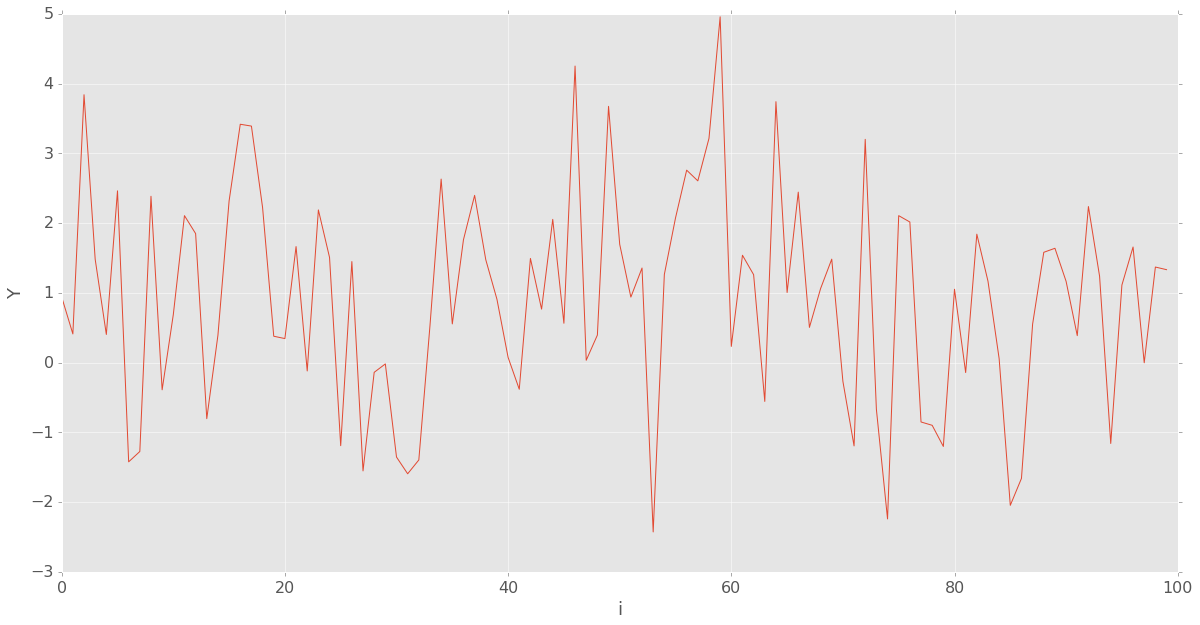

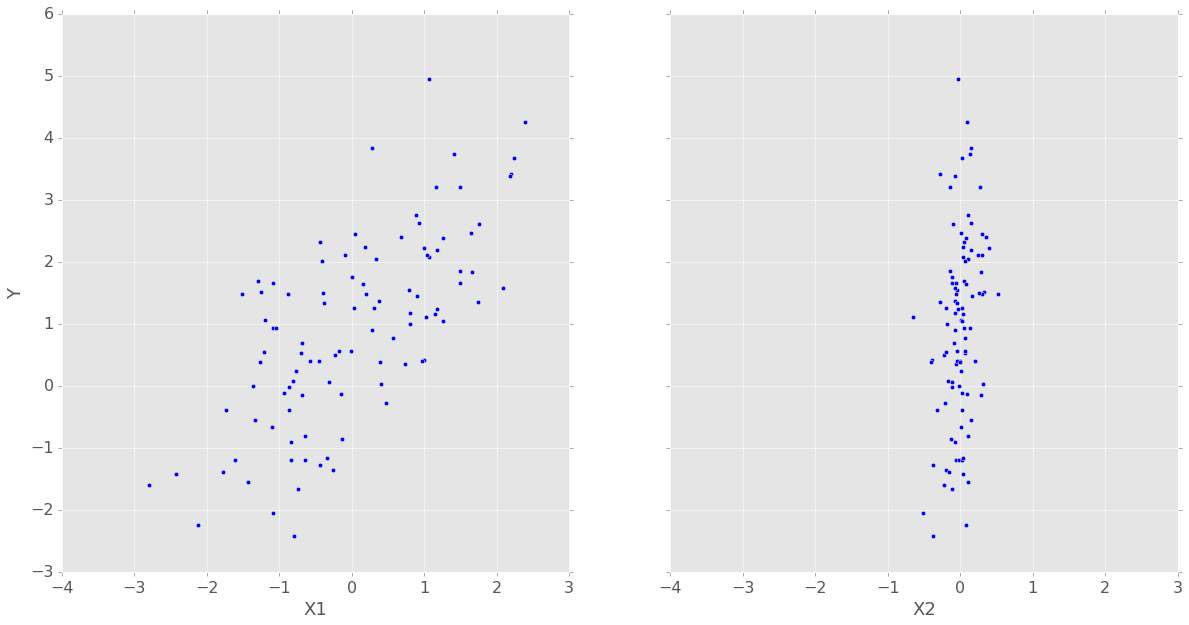

In [2]:
import pandas

# faktyczne wartosci parametrow
alpha, sigma = 1, 1
beta = [1, 2.5]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

plt.figure(figsize = (20,10))
plt.plot(Y)
plt.xlabel('i')
plt.ylabel('Y')

fig, axes = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 10))
axes[0].scatter(X1, Y)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('Y')

axes[1].scatter(X2, Y)
axes[1].set_xlabel('X2')

In [8]:
from pymc3.glm import glm
from pymc3 import Model, sample, traceplot


df = pandas.DataFrame({'x1': X1, 'x2': X2, 'y': Y})


with Model() as model_glm:
    glm('y ~ x1 + x2', df)
    trace = sample(5000)


Applied log-transform to sd and added transformed sd_log to model.
Assigned NUTS to Intercept
Assigned NUTS to x1
Assigned NUTS to x2
Assigned NUTS to sd_log_
 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc593cbda58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc58f4344a8>]], dtype=object)

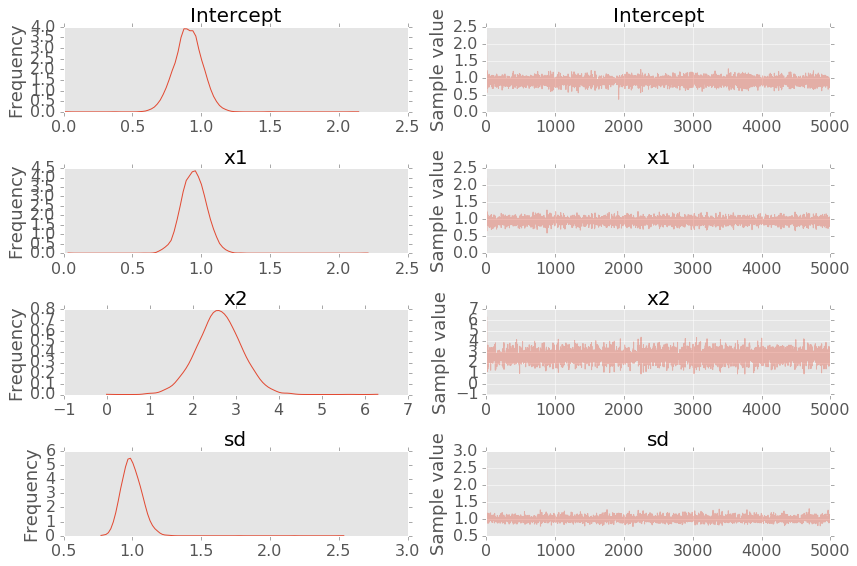

In [9]:
traceplot(trace)

In [12]:
from pymc3.glm.families import Binomial

df_logistic = pandas.DataFrame({'x1': X1, 'y': Y > np.median(Y)})

with Model() as model_glm_logistic:
    glm('y ~ x1', df_logistic, family=Binomial())
    trace = sample(5000)

Applied logodds-transform to p and added transformed p_logodds to model.
Assigned NUTS to Intercept
Assigned NUTS to x1
Assigned NUTS to p_logodds_
 [-----------------100%-----------------] 5000 of 5000 complete in 6.8 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc586647eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc584348198>]], dtype=object)

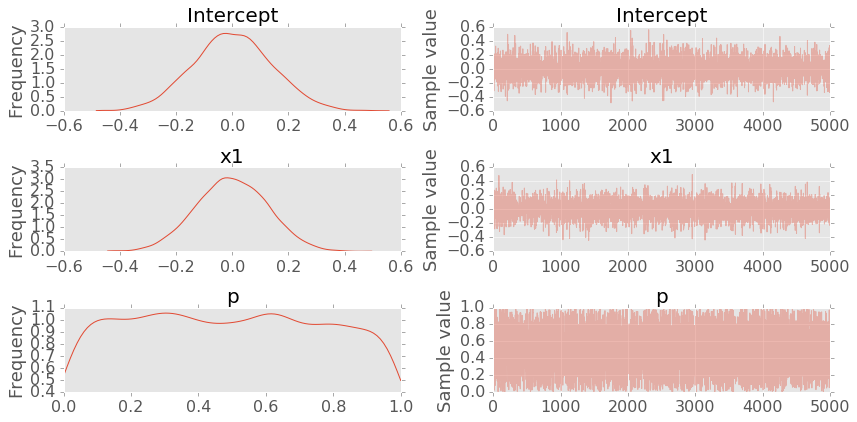

In [13]:
traceplot(trace)